In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

In [36]:
#Our daya is not using the default encoding (utf-8) so we make sure to specify the correct encoding when reading the file
data = pd.read_csv('volcdata.csv', encoding = 'unicode_escape', engine ='python')
data = data.dropna(subset=['Longitude'])

In [37]:
#we can create a new column that combines the latitude and logitude columns into a single tuple
data['position'] = list(zip(data['Latitude'], data['Longitude']))
data

,Year,Disaster Type,Disaster Subtype,Event Name,Country,ISO,Region,Continent,Latitude,Longitude,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,position
0,1902,Volcanic activity,Ash fall,Mount Pelee,Martinique,MTQ,Caribbean,Americas,14.82N,61.17W,...,8.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.963048,"(14.82N, 61.17W)"
1,1985,Volcanic activity,Ash fall,Nevado Del Ruiz,Colombia,COL,South America,Americas,4.895N,75.316W,...,13.0,21800.0,5000.0,7700.0,NaN,12700.0,1000000.0,2720684.0,36.755468,"(4.895N, 75.316W)"
2,1902,Volcanic activity,Ash fall,Santa Maria,Guatemala,GTM,Central America,Americas,14.757N,91.552W,...,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.963048,"(14.757N, 91.552W)"
3,1919,Volcanic activity,Ash fall,Mt. Kelud,Indonesia,IDN,South-Eastern Asia,Asia,7.937S,112.308E,...,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,5.937492,"(7.937S, 112.308E)"
4,1951,Volcanic activity,Ash fall,Lamington,Papua New Guinea,PNG,Melanesia,Oceania,5.035S,150.383E,...,20.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,8.889143,"(5.035S, 150.383E)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2013,Volcanic activity,Ash fall,Mt. Sinabung,Indonesia,IDN,South-Eastern Asia,Asia,3.17,98.392,...,NaN,NaN,NaN,29727.0,NaN,29727.0,NaN,NaN,79.601309,"(3.17, 98.392)"
239,2011,Volcanic activity,Ash fall,Mt. Taal,Philippines (the),PHL,South-Eastern Asia,Asia,14.002,120.993,...,18.0,NaN,NaN,1315.0,NaN,1315.0,NaN,NaN,76.861595,"(14.002, 120.993)"
246,2015,Volcanic activity,Lava flow,Cotopaxi,Ecuador,ECU,South America,Americas,-0.677,-78.436,...,22.0,NaN,NaN,800000.0,NaN,800000.0,NaN,NaN,80.988579,"(-0.677, -78.436)"
247,2015,Volcanic activity,NaN,Tungurahua,Ecuador,ECU,South America,Americas,-1.467,-78.442,...,NaN,NaN,NaN,130042.0,NaN,130042.0,NaN,NaN,80.988579,"(-1.467, -78.442)"


In [8]:
#We create another new column that converts our coordinates to a CRS (coordinate reference system) that can be used by Cartopy
data['crs'] = ccrs.Robinson()
data

,Year,Disaster Type,Disaster Subtype,Event Name,Country,ISO,Region,Continent,Latitude,Longitude,...,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,position,crs
0,1902,Volcanic activity,Ash fall,Mount Pelee,Martinique,MTQ,Caribbean,Americas,14.82N,61.17W,...,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.963048,"(14.82N, 61.17W)",+proj=robin +a=6378137.0 +lon_0=0 +no_defs +ty...
1,1985,Volcanic activity,Ash fall,Nevado Del Ruiz,Colombia,COL,South America,Americas,4.895N,75.316W,...,21800.0,5000.0,7700.0,NaN,12700.0,1000000.0,2720684.0,36.755468,"(4.895N, 75.316W)",+proj=robin +a=6378137.0 +lon_0=0 +no_defs +ty...
2,1902,Volcanic activity,Ash fall,Santa Maria,Guatemala,GTM,Central America,Americas,14.757N,91.552W,...,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.963048,"(14.757N, 91.552W)",+proj=robin +a=6378137.0 +lon_0=0 +no_defs +ty...
3,1919,Volcanic activity,Ash fall,Mt. Kelud,Indonesia,IDN,South-Eastern Asia,Asia,7.937S,112.308E,...,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,5.937492,"(7.937S, 112.308E)",+proj=robin +a=6378137.0 +lon_0=0 +no_defs +ty...
4,1951,Volcanic activity,Ash fall,Lamington,Papua New Guinea,PNG,Melanesia,Oceania,5.035S,150.383E,...,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,8.889143,"(5.035S, 150.383E)",+proj=robin +a=6378137.0 +lon_0=0 +no_defs +ty...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2021,Volcanic activity,Ash fall,Volcano 'Yasur',Vanuatu,VUT,Melanesia,Oceania,NaN,NaN,...,NaN,NaN,3383.0,NaN,3383.0,NaN,NaN,92.590193,"(nan, nan)",+proj=robin +a=6378137.0 +lon_0=0 +no_defs +ty...
268,2022,Volcanic activity,Ash fall,Mount Semeru,Indonesia,IDN,South-Eastern Asia,Asia,NaN,NaN,...,NaN,NaN,2489.0,NaN,2489.0,NaN,NaN,100.000000,"(nan, nan)",+proj=robin +a=6378137.0 +lon_0=0 +no_defs +ty...
269,2022,Volcanic activity,NaN,Taal,Philippines (the),PHL,South-Eastern Asia,Asia,NaN,NaN,...,NaN,NaN,10415.0,NaN,10415.0,NaN,NaN,100.000000,"(nan, nan)",+proj=robin +a=6378137.0 +lon_0=0 +no_defs +ty...
270,2023,Volcanic activity,Ash fall,Mount Fuego,Guatemala,GTM,Central America,Americas,NaN,NaN,...,NaN,NaN,1054.0,NaN,1054.0,NaN,NaN,NaN,"(nan, nan)",+proj=robin +a=6378137.0 +lon_0=0 +no_defs +ty...


In [41]:
print(np.array(data['Longitude']))

['61.17W' '75.316W' '91.552W' '112.308E' '150.383E' ' 10.288E' ' 115.508E'
 '61.18W' '110.446E' '120.994E' '110.446E' '110.446E' '91.552W' '76.63W'
 '112.308E' '102.251W' '14.426' '120.35 E' '152.203E' '124.666E' '90.880W'
 '105.423E' '120.994E' '110.446E' '29' '29.25' '123.7 E' '137.48'
 '110.4 E' '130.3 E' '112.3 E' '98.392' '62.14 W' '14.426' '98.38 W'
 '-76.03' '77.4 W' '15.004' '112.308' '112.9 E' '-78.442' '152.203'
 '40.82' '145.037' '127.33' '106 E' '-89.63' '-78.436' '86.7 W' '130.3 E'
 '110.26 E' '98.392' '-72.12' '17.33 W' '72.58 W' '-78.442' '15.004'
 '123.685' '124.79 E' '123.685' '86.7 W' '145.037' '145.037' '152.203'
 '72.58 W' '90.60 W' '71.85 W' '15.004' '121 E' '90.60 W' '130.3 E'
 '121 E' '145.037' '103.60 W' '98.62 W' '175.57 E' '90.6 W' '84.70 E'
 '90.60 W' '110.4 E' '103.60 W' '152.2 E' '9.17 E' '78.6 W' '103.62 W'
 '87 W' '86.7 W' '-90.601' '139.12' '-98.622' '-78.442' '-90.88' '-103.62'
 '168.346' '29.2' '-78.442' '-77.37' '40.46' '-78.442' '-76.03' '145.037'
 '

In [49]:
def convert_longitude(longitude):
    
    if longitude[-1]=='W':
        numeric_part= -float(longitude[:-1].strip())
    elif longitude[-1] == 'E':
        numeric_part= float(longitude[:-1].strip())
    else:
         numeric_part= float(longitude.strip())
            
    # Normalize the longitude value to be between -180 and 180
    while numeric_part > 180:
        numeric_part -= 360
    while numeric_part < -180:
        numeric_part += 360

    return numeric_part

def convert_latitude(latitude):
    # Strip any extra spaces and split by non-numeric characters
    if latitude[-1]=='S':
        numeric_part= -float(latitude[:-1].strip())
    elif latitude[-1] == 'N':
        numeric_part= float(latitude[:-1].strip())
    else:
         numeric_part= float(latitude.strip())
    
    # Normalize the latitude value to be between -90 and 90
    numeric_part = max(min(numeric_part, 90), -90)

    return numeric_part

In [52]:
lon = [convert_longitude(lon) for lon in data['Longitude']]
print(lon)

lat = [convert_latitude(lat) for lat in data['Latitude']]
print(lat)

[-61.17, -75.316, -91.552, 112.308, 150.383, 10.288, 115.508, -61.18, 110.446, 120.994, 110.446, 110.446, -91.552, -76.63, 112.308, -102.251, 14.426, 120.35, 152.203, 124.666, -90.88, 105.423, 120.994, 110.446, 29.0, 29.25, 123.7, 137.48, 110.4, 130.3, 112.3, 98.392, -62.14, 14.426, -98.38, -76.03, -77.4, 15.004, 112.308, 112.9, -78.442, 152.203, 40.82, 145.037, 127.33, 106.0, -89.63, -78.436, -86.7, 130.3, 110.26, 98.392, -72.12, -17.33, -72.58, -78.442, 15.004, 123.685, 124.79, 123.685, -86.7, 145.037, 145.037, 152.203, -72.58, -90.6, -71.85, 15.004, 121.0, -90.6, 130.3, 121.0, 145.037, -103.6, -98.62, 175.57, -90.6, 84.7, -90.6, 110.4, -103.6, 152.2, 9.17, -78.6, -103.62, -87.0, -86.7, -90.601, 139.12, -98.622, -78.442, -90.88, -103.62, 168.346, 29.2, -78.442, -77.37, 40.46, -78.442, -76.03, 145.037, 168.346, -70.9, 123.685, 168.346, 112.308, -72.65, -72.65, 124.05, -19.64, -78.442, -90.601, -72.12, 123.685, 124.05, 124.05, 124.79, 98.392, 120.993, -78.436, -78.442, 123.685]
[14.82,

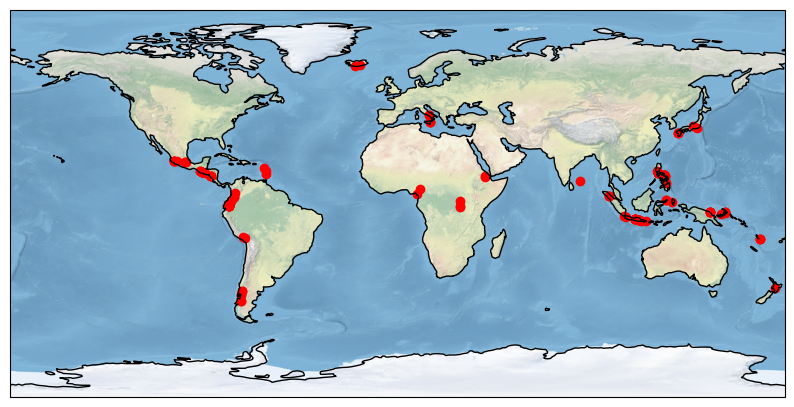

In [57]:
#Now we can plot our data, we create a new figure and cartopy projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

ax.scatter(lon,lat, transform=ccrs.PlateCarree(),c='r')
plt.show()